In [2]:
import json
import os

In [35]:
dir = "../../outputs/"

folders = ["G1_category_type1_qaq_v2_chatgpt4",
                "G1_category_type2_qaq_v2_chatgpt4",
                "G1_category_type3_qaq_v2_chatgpt4",
                "G1_category_type4_qaq_v2_chatgpt4",
                "G1_instruction_type1_qaq_v2_chatgpt4",
                "G1_instruction_type2_qaq_v2_chatgpt4",
                "G1_instruction_type3_qaq_v2_chatgpt4",
                "G1_instruction_type4_qaq_v2_chatgpt4",
                "G1_tool_type1_qaq_v2_chatgpt4",
                "G1_tool_type2_qaq_v2_chatgpt4",
                "G1_tool_type3_qaq_v2_chatgpt4",
                "G1_tool_type4_qaq_v2_chatgpt4"]

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


def getcounts(folder):
    files = os.listdir(dir + folder)
    count = 0
    total = len(files)

    name = "get_qaq_for_qaq"

    for i in files:
        with open(dir + folder + "/" + i, 'r') as f:
            data =json.load(f)
        
        trys = data["trys"]
        candidate = data["compare_candidates"]
        
        majority = 0
        use = 0
        for t in trys:
            for node in t["chain"]:
                if node["description"] == name:
                    use += 1
                    break


            majority += 1 
        
        if use > majority - use:
            count += 1

    return (count, total)


def createConfusionMatrix(counts):
    pred = []
    actual = []
    for i in counts:
        if "type1" in i:
            pred.extend([1 for i in range(counts[i][0])])
            # actual.extend([0 for i in range(counts[i][0])])
            pred.extend([0 for i in range(counts[i][1] - counts[i][0])])
            actual.extend([0 for i in range(counts[i][1])])

        if "type2" in i:
            pred.extend([1 for i in range(counts[i][0])])
            # actual.extend([1 for i in range(counts[i][0])])
            pred.extend([0 for i in range(counts[i][1] - counts[i][0])])
            actual.extend([1 for i in range(counts[i][1])])

        if "type3" in i:
            pred.extend([1 for i in range(counts[i][0])])
            # actual.extend([1 for i in range(counts[i][0])])
            pred.extend([0 for i in range(counts[i][1] - counts[i][0])])
            actual.extend([1 for i in range(counts[i][1])])
        
        if "type4" in i:
            pred.extend([1 for i in range(counts[i][0])])
            # actual.extend([1 for i in range(counts[i][0])])
            pred.extend([0 for i in range(counts[i][1] - counts[i][0])])
            actual.extend([1 for i in range(counts[i][1])])

    cm = confusion_matrix(actual, pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["NO_QAQ", "QAQ"], yticklabels=["NO_QAQ", "QAQ"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)




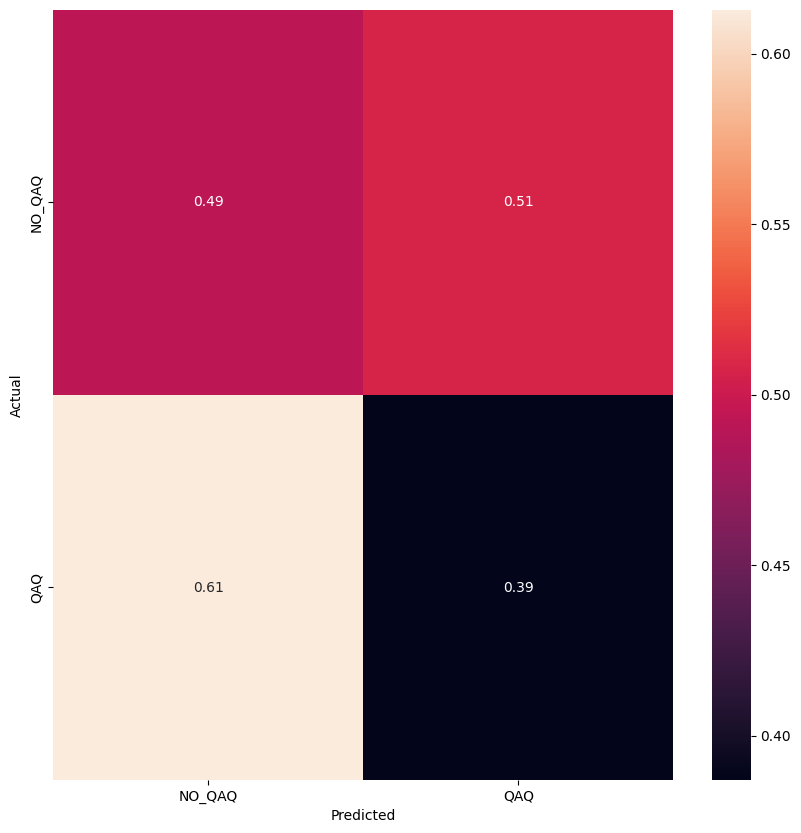

In [37]:
counts = {}
for i in folders:
    counts[i] = getcounts(i)


createConfusionMatrix(counts)